In [16]:
%matplotlib inline

from time import time
from math import sqrt, floor
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace
from pandas.plotting import scatter_matrix
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.style.use = "default"

In [17]:
train = pd.read_csv("TestData3.txt", sep=",", header=None)
labels = pd.read_csv("TrainLabel3.txt", sep='\t')

In [18]:
def merge(df, labels):
    return labels.merge(df, left_index=True,right_index=True)

In [19]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000
mean,1.541,24136653.576,3.407,12253995.652,15967326.421,77979951.886,1.496,44931306.014,0.618,23393986.221,36019311.156,5570002.221,59784627.869
std,0.498,153501863.784,1.635,110037846.416,125372261.145,268189827.436,0.712,207191751.434,1.009,151179339.534,186372789.674,74438087.894,237131410.035
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,1.000,1.000,2.000,3.000,1.000,4.000,1.000,2.000,0.000,1.000,1.000,5.000,1.000
50%,2.000,3.000,3.000,4.000,4.000,5.000,1.000,3.000,0.000,2.000,1.000,7.000,1.000
75%,2.000,5.000,4.000,5.000,6.000,5.000,2.000,4.000,1.000,2.000,3.000,7.000,1.000
max,2.000,1000000000.000,7.000,1000000000.000,1000000000.000,1000000000.000,3.000,1000000000.000,7.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000


In [20]:
train.shape

(2693, 13)

In [21]:
labels["9"].value_counts()

1    1235
8     912
6     777
7     677
9     595
4     566
2     554
5     495
3     488
Name: 9, dtype: int64

Looks like we have the same problem as in 1.1 - let's checkout how many huge numbers we have, the stats for the columns without them, and what we could replace them with.

In [22]:
problem_cols = []
for col in train.columns:
    if train[col].mean() < train[col].std():
        problem_cols.append(col)

In [23]:
# for each col, get all rows w./ higher than mean
errors = train[problem_cols].apply(lambda x: x[x > x.mean()])
errors.describe()

,1,3,4,5,7,8,9,10,11,12
count,65.000,33.000,43.000,210.000,121.000,935.000,63.000,97.000,15.000,161.000
mean,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1.781,1000000000.000,1000000000.000,1000000000.000,1000000000.000
std,0.000,0.000,0.000,0.000,0.000,0.929,0.000,0.000,0.000,0.000
min,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000
25%,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000
50%,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,2.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000
75%,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,2.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000
max,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,7.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000


Looks like 0 doesn't belong - lets remove it and all the error values. replace them with the mean.

In [28]:
# errors.drop(0)
# problem_cols.pop(problem_cols.index("0"))

In [29]:
train[problem_cols].apply(lambda x: x[x < x.mean()]).describe()

,1,3,4,5,7,8,9,10,11,12
count,2628.000,2660.000,2650.000,2483.000,2572.000,1758.000,2630.000,2596.000,2678.000,2532.000
mean,3.075,3.868,3.793,4.201,2.759,0.000,1.860,1.904,5.967,1.126
std,1.796,1.290,2.541,1.217,1.475,0.000,0.739,1.127,1.786,0.416
min,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,1.000,3.000,1.000,4.000,2.000,0.000,1.000,1.000,5.000,1.000
50%,3.000,4.000,4.000,5.000,2.000,0.000,2.000,1.000,7.000,1.000
75%,5.000,5.000,6.000,5.000,4.000,0.000,2.000,3.000,7.000,1.000
max,5.000,6.000,9.000,5.000,9.000,0.000,3.000,5.000,8.000,3.000


In [30]:
errors.apply(lambda x: x.dropna().value_counts() / x.dropna().shape[0])

,1,3,4,5,7,8,9,10,11,12
1.000,nan,nan,nan,nan,nan,0.459,nan,nan,nan,nan
2.000,nan,nan,nan,nan,nan,0.374,nan,nan,nan,nan
3.000,nan,nan,nan,nan,nan,0.119,nan,nan,nan,nan
4.000,nan,nan,nan,nan,nan,0.031,nan,nan,nan,nan
5.000,nan,nan,nan,nan,nan,0.011,nan,nan,nan,nan
6.000,nan,nan,nan,nan,nan,0.005,nan,nan,nan,nan
7.000,nan,nan,nan,nan,nan,0.001,nan,nan,nan,nan
1000000000.000,1.000,1.000,1.000,1.000,1.000,nan,1.000,1.000,1.000,1.000


In [33]:
for col in problem_cols:
    train_col = train[col]
    gt_mean = train_col > train_col.mean()
    new_col_mean = train_col[~gt_mean].mean()
    
    train.loc[col][gt_mean] = new_col_mean

train.describe()

/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000
mean,1.541,3.075,3.407,3.868,3.793,4.201,1.496,2.759,0.000,1.860,1.904,5.967,1.126
std,0.498,1.774,1.635,1.282,2.520,1.169,0.712,1.441,0.000,0.730,1.107,1.781,0.404
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,1.000,1.000,2.000,3.000,1.000,4.000,1.000,2.000,0.000,1.000,1.000,5.000,1.000
50%,2.000,3.000,3.000,4.000,4.000,5.000,1.000,2.759,0.000,2.000,1.000,7.000,1.000
75%,2.000,5.000,4.000,5.000,6.000,5.000,2.000,4.000,0.000,2.000,3.000,7.000,1.000
max,2.000,5.000,7.000,6.000,9.000,5.000,3.000,9.000,0.000,3.000,5.000,8.000,3.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106a311d0>,
      dtype=object)

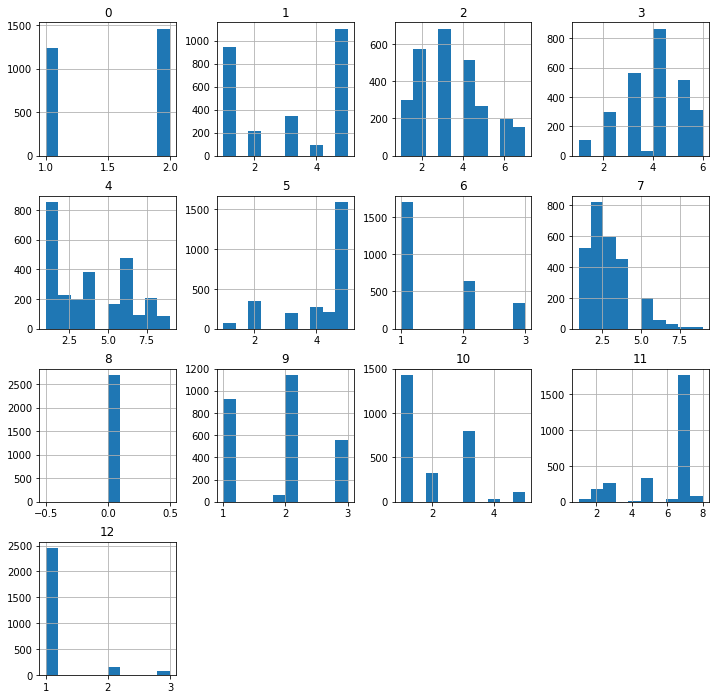

In [34]:
train.hist(figsize=(12,12))

Looks like there's a lot of the duplicated values. Lets check it out

In [35]:
train.apply(lambda x: x.value_counts())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0.000,nan,nan,nan,nan,nan,nan,nan,nan,2693.000,nan,nan,nan,nan
1.000,1237.000,942.000,300.000,106.000,855.000,66.000,1702.000,520.000,nan,928.000,1430.000,41.000,2293.000
1.126,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,161.000
1.860,nan,nan,nan,nan,nan,nan,nan,nan,nan,63.000,nan,nan,nan
1.904,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,97.000,nan,nan
2.000,1456.000,215.000,575.000,301.000,225.000,347.000,646.000,822.000,nan,1142.000,230.000,174.000,159.000
2.759,nan,nan,nan,nan,nan,nan,nan,121.000,nan,nan,nan,nan,nan
3.000,nan,279.000,681.000,563.000,198.000,203.000,345.000,475.000,nan,560.000,798.000,255.000,80.000
3.075,nan,65.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3.793,nan,nan,nan,nan,43.000,nan,nan,nan,nan,nan,nan,nan,nan


In [36]:
corr = train.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000,-0.078,0.020,-0.069,0.030,0.045,0.062,0.046,nan,-0.012,-0.026,0.001,-0.016
1,-0.078,1.000,-0.506,-0.315,0.188,-0.095,-0.762,-0.038,nan,0.568,0.165,-0.060,0.039
2,0.020,-0.506,1.000,0.419,-0.022,0.186,0.410,-0.286,nan,-0.659,-0.100,0.146,-0.059
3,-0.069,-0.315,0.419,1.000,-0.376,-0.046,0.191,-0.269,nan,-0.487,0.021,0.126,-0.153
4,0.030,0.188,-0.022,-0.376,1.000,0.046,-0.026,0.089,nan,0.222,-0.018,-0.010,0.076
5,0.045,-0.095,0.186,-0.046,0.046,1.000,0.071,0.084,nan,-0.091,-0.216,-0.046,-0.048
6,0.062,-0.762,0.410,0.191,-0.026,0.071,1.000,0.109,nan,-0.458,-0.187,0.087,-0.019
7,0.046,-0.038,-0.286,-0.269,0.089,0.084,0.109,1.000,nan,0.207,-0.277,-0.084,0.120
8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,-0.012,0.568,-0.659,-0.487,0.222,-0.091,-0.458,0.207,nan,1.000,0.139,-0.143,0.109


In [37]:
corr[np.abs(corr) > .7 ]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,1.000,nan,nan,nan,nan,-0.762,nan,nan,nan,nan,nan,nan
2,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan
5,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan
6,nan,-0.762,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan
7,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan
8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan


In [39]:
# train.plot.scatter("3", "1")

In [40]:
train = train.astype("int32")

In [41]:
train.to_csv("cleaned_test.csv")
labels.to_csv("cleaned_label.csv")